In [163]:
#Dependencies
import pandas as pd
import numpy as np
import os 
import datetime
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import scipy.stats as stats

In [60]:
# reading Boston_Master file(that is merged with Listings and Calendar)
file1 = "../Output/Boston_Master_DF.csv"
boston_df = pd.read_csv(file1)
del boston_df['Unnamed: 0']
boston_df.head()

,listing_id,date,available,price,year,Location,name,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,City
0,3075044,2017-08-22,t,65.0,2017,Boston,Charming room in pet friendly apt,42.286241,-71.134374,Apartment,2.0,1.0,1.0,1.0,94.0,Boston
1,3075044,2017-08-21,t,65.0,2017,Boston,Charming room in pet friendly apt,42.286241,-71.134374,Apartment,2.0,1.0,1.0,1.0,94.0,Boston
2,3075044,2017-08-20,t,65.0,2017,Boston,Charming room in pet friendly apt,42.286241,-71.134374,Apartment,2.0,1.0,1.0,1.0,94.0,Boston
3,3075044,2017-08-19,t,75.0,2017,Boston,Charming room in pet friendly apt,42.286241,-71.134374,Apartment,2.0,1.0,1.0,1.0,94.0,Boston
4,3075044,2017-08-18,t,75.0,2017,Boston,Charming room in pet friendly apt,42.286241,-71.134374,Apartment,2.0,1.0,1.0,1.0,94.0,Boston


In [165]:
# reading Seattle_Master file(that is merged with Listings and Calendar)
file2 = "../Output/Seattle_Master_DF.csv"
seattle_df = pd.read_csv(file2)
del seattle_df['Unnamed: 0']
seattle_df.head()

,listing_id,date,available,price,year,Location,Month,name,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,City
0,241032,2016-01-04,t,85.0,2016,Seattle,1,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle
1,241032,2016-01-05,t,85.0,2016,Seattle,1,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle
2,241032,2016-01-13,t,85.0,2016,Seattle,1,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle
3,241032,2016-01-14,t,85.0,2016,Seattle,1,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle
4,241032,2016-01-18,t,85.0,2016,Seattle,1,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle


In [168]:
# reading the final output (merged Boston_df and Seattle_df)
file3 = "../Output/Final_DF.csv"
final_df = pd.read_csv(file3)
final_df.head()

,Unnamed: 0,listing_id,date,available,price,year,Location,name,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,City
0,0,241032,2016-01-04 00:00:00,t,85.0,2016,Seattle,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle
1,1,241032,2016-01-05 00:00:00,t,85.0,2016,Seattle,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle
2,2,241032,2016-01-13 00:00:00,t,85.0,2016,Seattle,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle
3,3,241032,2016-01-14 00:00:00,t,85.0,2016,Seattle,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle
4,4,241032,2016-01-18 00:00:00,t,85.0,2016,Seattle,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle


In [169]:
# grouping by Boston and Seattle to get average, min and max price
location = final_df.groupby('Location').price.mean(), final_df.groupby('Location').price.min(),final_df.groupby('Location').price.max()
location


(Location
 Boston     198.183371
 Seattle    140.159800
 Name: price, dtype: float64, Location
 Boston     20.0
 Seattle    10.0
 Name: price, dtype: float64, Location
 Boston     7163.0
 Seattle    1650.0
 Name: price, dtype: float64)

In [170]:
# cleaning up rows that do not have values/prices in the boston file
boston_df = boston_df.dropna(how="any")
boston_df.count()

listing_id              409460
date                    409460
available               409460
price                   409460
year                    409460
Location                409460
name                    409460
latitude                409460
longitude               409460
property_type           409460
accommodates            409460
bathrooms               409460
bedrooms                409460
beds                    409460
review_scores_rating    409460
City                    409460
dtype: int64

In [197]:
# cleaning up rows that do not have values/prices in the seattle file
seattle_df = seattle_df.dropna(how="any")
seattle_df.count()


listing_id              590693
date                    590693
available               590693
price                   590693
year                    590693
Location                590693
Month                   590693
name                    590693
latitude                590693
longitude               590693
property_type           590693
accommodates            590693
bathrooms               590693
bedrooms                590693
beds                    590693
review_scores_rating    590693
City                    590693
dtype: int64

In [198]:
#selecting random sample for boston to perform T-Test for hypothesis
chosen1 = np.random.choice(5, replace = False, size = 5) 
boston_dfloc = boston_df.iloc[chosen1]
boston_dfloc

,listing_id,date,available,price,year,Location,name,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,City
0,3075044,2017-08-22,t,65.0,2017,Boston,Charming room in pet friendly apt,42.286241,-71.134374,Apartment,2.0,1.0,1.0,1.0,94.0,Boston
1,3075044,2017-08-21,t,65.0,2017,Boston,Charming room in pet friendly apt,42.286241,-71.134374,Apartment,2.0,1.0,1.0,1.0,94.0,Boston
4,3075044,2017-08-18,t,75.0,2017,Boston,Charming room in pet friendly apt,42.286241,-71.134374,Apartment,2.0,1.0,1.0,1.0,94.0,Boston
2,3075044,2017-08-20,t,65.0,2017,Boston,Charming room in pet friendly apt,42.286241,-71.134374,Apartment,2.0,1.0,1.0,1.0,94.0,Boston
3,3075044,2017-08-19,t,75.0,2017,Boston,Charming room in pet friendly apt,42.286241,-71.134374,Apartment,2.0,1.0,1.0,1.0,94.0,Boston


In [199]:
#selecting random sample for seattle to perform T-Test for hypothesis
chosen2 = np.random.choice(5, replace = False, size = 5)
seattle_dfloc = seattle_df.iloc[chosen2]
seattle_dfloc


,listing_id,date,available,price,year,Location,Month,name,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,City
2,241032,2016-01-13,t,85.0,2016,Seattle,1,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle
0,241032,2016-01-04,t,85.0,2016,Seattle,1,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle
4,241032,2016-01-18,t,85.0,2016,Seattle,1,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle
3,241032,2016-01-14,t,85.0,2016,Seattle,1,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle
1,241032,2016-01-05,t,85.0,2016,Seattle,1,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4.0,1.0,1.0,1.0,95.0,Seattle


In [200]:
population1 = boston_dfloc['price']
population2 = seattle_dfloc['price']

In [201]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-6.531972647421809, pvalue=0.0028378459267344464)

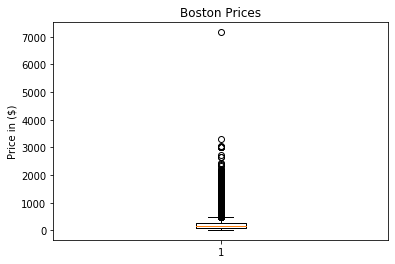

In [203]:
#Boxplot to show outliers for max price for Boston
outliers = boston_df['price']

fig1, ax1 = plt.subplots()
ax1.set_title('Boston Prices')
ax1.set_ylabel('Price in ($)')
ax1.boxplot(outliers)
plt.show()

In [204]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = outliers.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (0.5*iqr)
upper_bound = upperq + (0.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price is: 90.0
The upper quartile of price is: 255.0
The interquartile range of price is: 165.0
The the median of price is: 160.0 
Values below 7.5 could be outliers.
Values above 337.5 could be outliers.


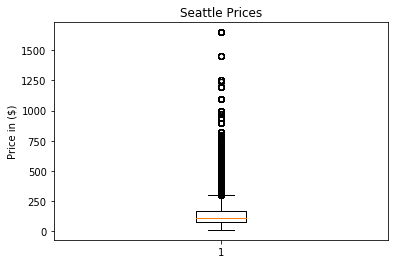

In [207]:
#Boxplot to show outliers for max price for Seattle
outliers1 = seattle_df['price']

fig1, ax1 = plt.subplots()
ax1.set_title('Seattle Prices')
ax1.set_ylabel('Price in ($)')
ax1.boxplot(outliers1)
plt.show()

In [210]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = outliers1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (0.5*iqr)
upper_bound = upperq + (0.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price is: 75.0
The upper quartile of price is: 165.0
The interquartile range of price is: 90.0
The the median of price is: 110.0 
Values below 30.0 could be outliers.
Values above 210.0 could be outliers.
